# Proyek Analisis Data: Air Quality Guanyuan
- Nama: Ali Akbar Said
- Email : aliakbarsaid@gmail.com
- ID Cohort : A001YBF001
- Program: Laskar AI 2025

## Menentukan Pertanyaan bisnis

- Bagaimana kualitas udara di Guanyuan dari tahun ke tahun? apakah ada perbaikan?
- Bagaimana trend udara di Guanyuan berdasarkan bulan?, dan dibulan apakah polusi udara di Guanyuan paling sedikit?
- Bagaimana trend udara di Guanyuan berdasarkan hari?, dan tanggal berapakah polusi udara di Guanyuan paling sedikit?
- Bagaimana trend udara di Guanyuan berdasarkan jam?, dan dijam berapakah polusi udara di Guanyuan paling sedikit?
- Apakah ada korelasi polusi PM2.5, PM10, SO2, NO2, CO, dan O3 dengan seperti suhu, tekanan, titik embun, hujan, arah angin, dan kecepatan angin?

## Import Library

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [26]:
guanyuanDf = pd.read_csv("./PRSA_Data_Guanyuan_20130301-20170228.csv")
guanyuanDf.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [27]:
# create a datetime column using the year,month,day and hour columns.
years = guanyuanDf['year'].values
months = guanyuanDf['month'].values
days = guanyuanDf['day'].values
hours = guanyuanDf['hour'].values
full_date = []

for i in range(guanyuanDf.shape[0]):
    date_time = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
    full_date.append(date_time)

dates = pd.to_datetime(full_date)
dates = pd.DataFrame(dates,columns=['date'])
guanyuanDf = pd.concat([dates,guanyuanDf],axis=1)

guanyuanDf.head()

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,2013-03-01 02:00:00,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,2013-03-01 03:00:00,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


### Assessing Data

In [28]:
guanyuanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     35064 non-null  datetime64[ns]
 1   No       35064 non-null  int64         
 2   year     35064 non-null  int64         
 3   month    35064 non-null  int64         
 4   day      35064 non-null  int64         
 5   hour     35064 non-null  int64         
 6   PM2.5    34448 non-null  float64       
 7   PM10     34635 non-null  float64       
 8   SO2      34590 non-null  float64       
 9   NO2      34405 non-null  float64       
 10  CO       33311 non-null  float64       
 11  O3       33891 non-null  float64       
 12  TEMP     35044 non-null  float64       
 13  PRES     35044 non-null  float64       
 14  DEWP     35044 non-null  float64       
 15  RAIN     35044 non-null  float64       
 16  wd       34983 non-null  object        
 17  WSPM     35050 non-null  float6

Check Null And Duplcate Data

In [29]:
guanyuanDf.isna().sum()

,0
date,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659


In [30]:
guanyuanDf.duplicated().sum()

0

In [31]:
guanyuanDf.describe(include="all")

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,34983,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,35064
mean,2015-03-01 11:30:00,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,NaN,11.200000,NaN


### Cleaning Data

In [32]:
# Use mean data for null value
guanyuanDf['PM2.5'].fillna(value=82.7, inplace=True)
guanyuanDf['PM10'].fillna(value=110.0, inplace=True)
guanyuanDf['SO2'].fillna(value=17.3, inplace=True)
guanyuanDf['NO2'].fillna(value=59.3, inplace=True)
guanyuanDf['CO'].fillna(value=1262.9, inplace=True)
guanyuanDf['O3'].fillna(value=56.3, inplace=True)
guanyuanDf['TEMP'].fillna(value=13.5, inplace=True)
guanyuanDf['PRES'].fillna(value=1011.8, inplace=True)
guanyuanDf['DEWP'].fillna(value=3.1, inplace=True)
guanyuanDf['RAIN'].fillna(value=0.06, inplace=True)
guanyuanDf['WSPM'].fillna(value=1.7, inplace=True)
# Use top data for null value
guanyuanDf['wd'].fillna(value="NE", inplace=True)

<ipython-input-32-650584e8e0f0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  guanyuanDf['PM2.5'].fillna(value=82.7, inplace=True)
<ipython-input-32-650584e8e0f0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

### Exploratory Data Analysis ( EDA )

In [33]:
guanyuanDf.groupby("year").mean(numeric_only=True)

,No,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,,,,,
2013,3672.5,7.500000,15.803922,11.5,82.137309,107.785675,21.831736,58.311698,1196.006291,58.243116,15.497740,1008.200408,6.465400,0.071582,1.532993
2014,11724.5,6.526027,15.720548,11.5,88.250297,115.748231,22.968836,63.770811,1351.067443,55.280457,13.878128,1011.318082,4.162203,0.056610,1.476895
2015,20484.5,6.526027,15.720548,11.5,82.415742,106.380205,14.110731,54.971244,1314.552192,56.762854,13.478408,1012.568415,2.736279,0.072685,1.895582
2016,29256.5,6.513661,15.756831,11.5,77.224841,104.751025,11.541746,53.584051,1174.695128,54.949954,13.863250,1012.823720,2.287614,0.079750,1.859255
2017,34356.5,1.474576,15.288136,11.5,92.682274,116.988701,21.284534,65.028884,1489.498941,45.955155,0.773682,1023.507333,-13.065254,0.003573,1.958828


In [34]:
guanyuanDf.groupby("month").mean(numeric_only=True)

,No,year,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
month,,,,,,,,,,,,,,,
1,20862.500000,2015.500000,16.000000,11.5,93.462769,116.023488,34.690894,69.977184,1809.135417,25.379738,-1.575711,1023.201193,-14.263239,0.000578,1.878091
2,21612.287611,2015.504425,14.628319,11.5,87.224041,102.905605,31.217625,58.201254,1382.436984,36.799963,1.304296,1021.378847,-12.684034,0.010863,1.974041
3,13518.500000,2014.500000,16.000000,11.5,94.323353,135.528125,31.294638,67.324355,1337.266431,48.242190,8.403951,1014.972116,-7.177352,0.009073,2.028125
4,14250.500000,2014.500000,15.500000,11.5,74.273264,120.356250,15.544160,54.094038,873.144479,70.132001,15.309271,1009.360347,1.170903,0.023542,2.173958
5,14982.500000,2014.500000,16.000000,11.5,64.725672,116.447782,15.739208,48.613872,888.911425,90.035590,21.419657,1003.427655,7.710517,0.047413,2.043548
6,15714.500000,2014.500000,15.500000,11.5,73.761875,92.154514,8.530590,43.642740,1082.226042,92.734831,24.561424,1000.316250,16.130382,0.157326,1.543021
7,16446.500000,2014.500000,16.000000,11.5,75.980208,90.115255,7.175941,41.109840,987.789281,91.567081,27.195262,999.078730,20.390759,0.267238,1.470397
8,17190.500000,2014.500000,16.000000,11.5,59.267574,76.455612,5.011285,44.269743,863.308031,88.674655,26.715121,1002.197077,19.356250,0.116532,1.420296
9,17922.500000,2014.500000,15.500000,11.5,65.784757,83.841215,6.771897,53.707690,976.914722,54.417279,20.889666,1009.673681,14.366111,0.117472,1.349444


In [35]:
guanyuanDf.groupby("day").mean(numeric_only=True)

,No,year,month,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
day,,,,,,,,,,,,,,,
1,17198.500000,2014.666667,6.500000,11.5,90.888715,114.122135,15.495531,57.361941,1350.747396,55.165158,13.383681,1011.153646,3.217448,0.109896,1.713368
2,17222.500000,2014.666667,6.500000,11.5,76.832378,95.633594,18.205469,57.795139,1227.303299,51.387140,13.550744,1010.442361,2.817014,0.053125,1.656771
3,17246.500000,2014.666667,6.500000,11.5,83.889757,114.260417,18.871962,58.865538,1370.044705,57.418585,13.965538,1010.705208,2.509201,0.000694,1.796354
4,17270.500000,2014.666667,6.500000,11.5,88.962587,117.645833,17.330990,60.540365,1468.133247,56.998191,13.556134,1011.095052,3.080729,0.087674,1.713715
5,17294.500000,2014.666667,6.500000,11.5,79.008247,105.286285,16.700955,54.880729,1263.654601,60.637160,13.855903,1012.145775,2.993403,0.035503,1.814149
6,17318.500000,2014.666667,6.500000,11.5,89.386545,109.192708,19.766580,58.056858,1366.155122,57.559471,13.340842,1012.469401,2.793750,0.071181,1.603212
7,17342.500000,2014.666667,6.500000,11.5,87.556684,106.521701,18.214236,57.795573,1291.327691,56.545456,13.545602,1012.191638,3.369010,0.134028,1.663542
8,17366.500000,2014.666667,6.500000,11.5,84.769097,108.027083,18.952641,56.214567,1200.039410,58.287379,13.216109,1012.392535,2.206597,0.044444,1.870573
9,17390.500000,2014.666667,6.500000,11.5,75.316146,102.737847,15.505642,55.223517,1159.176128,54.937059,12.678819,1012.920631,2.028212,0.041667,1.793663


In [36]:
guanyuanDf.groupby("hour").mean(numeric_only=True)

,No,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
hour,,,,,,,,,,,,,,,
0,17521.0,2014.66256,6.52293,15.729637,91.061807,120.077344,18.028964,65.882381,1393.089870,42.005491,11.373657,1012.252008,3.826489,0.075537,1.330732
1,17522.0,2014.66256,6.52293,15.729637,90.316496,116.869268,19.056543,64.486416,1409.109240,37.941259,10.906431,1012.176112,3.919165,0.045380,1.285695
2,17523.0,2014.66256,6.52293,15.729637,88.185421,113.163723,19.227723,62.947397,1349.342779,33.999790,10.445252,1012.115070,3.808966,0.055921,1.253525
3,17524.0,2014.66256,6.52293,15.729637,86.532307,108.634428,17.628727,61.588913,1344.285626,33.387315,10.059705,1012.064374,3.721697,0.122628,1.216701
4,17525.0,2014.66256,6.52293,15.729637,84.160712,104.859001,16.720274,61.062051,1327.155852,30.173367,9.741369,1012.058898,3.572827,0.073895,1.187817
5,17526.0,2014.66256,6.52293,15.729637,81.093018,101.392197,15.832743,59.505326,1294.268241,27.183185,9.479500,1012.212081,3.501232,0.052676,1.204791
6,17527.0,2014.66256,6.52293,15.729637,79.467146,100.588638,15.623513,60.249831,1307.879124,25.469348,9.628264,1012.438193,3.493361,0.043915,1.285558
7,17528.0,2014.66256,6.52293,15.729637,78.293361,101.594593,16.142910,62.773182,1353.585079,23.284032,10.560857,1012.818834,3.422724,0.029925,1.404107
8,17529.0,2014.66256,6.52293,15.729637,78.437029,104.147159,17.514400,63.615476,1398.790828,24.673870,11.978636,1013.083162,3.263723,0.042313,1.591718


In [37]:
guanyuanDf.corr(numeric_only = True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.007787,-0.016895,-0.213366,-0.039136,0.019504,-0.051989,-0.107730,0.236794,-0.133160,0.002213,0.095764
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,1.164482e-15,-0.017355,-0.014790,-0.157225,-0.052091,0.003659,-0.028548,-0.137133,0.232448,-0.197177,-0.001038,0.133624
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,4.724770e-16,0.038583,-0.009884,-0.213340,0.054927,0.062899,-0.091140,0.130313,-0.005653,0.273096,0.013494,-0.161267
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,-4.489555e-17,0.009169,0.029808,-0.009807,0.005475,-0.004725,0.003702,0.014318,0.022530,0.023420,-0.002493,-0.016706
hour,0.000684,1.164482e-15,4.724770e-16,-4.489555e-17,1.000000e+00,0.002891,0.033876,-0.014870,-0.039746,-0.042344,0.285759,0.141115,-0.037600,-0.013425,0.011527,0.155478
PM2.5,-0.007787,-1.735542e-02,3.858259e-02,9.168544e-03,2.891321e-03,1.000000,0.884974,0.489702,0.684256,0.775446,-0.138165,-0.126621,-0.004848,0.123734,-0.010457,-0.281611
PM10,-0.016895,-1.478983e-02,-9.884457e-03,2.980819e-02,3.387600e-02,0.884974,1.000000,0.465730,0.654648,0.703424,-0.099712,-0.090897,-0.046765,0.083999,-0.026150,-0.188152
SO2,-0.213366,-1.572254e-01,-2.133401e-01,-9.806980e-03,-1.487024e-02,0.489702,0.465730,1.000000,0.519890,0.552267,-0.175847,-0.358257,0.210625,-0.269380,-0.040009,-0.138543
NO2,-0.039136,-5.209130e-02,5.492675e-02,5.475294e-03,-3.974564e-02,0.684256,0.654648,0.519890,1.000000,0.721656,-0.501700,-0.322161,0.151337,-0.049624,-0.046694,-0.452569
CO,0.019504,3.659126e-03,6.289855e-02,-4.724650e-03,-4.234369e-02,0.775446,0.703424,0.552267,0.721656,1.000000,-0.303789,-0.308466,0.157023,-0.042677,-0.011679,-0.301780


### Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana kualitas udara di Guanyuan dari tahun ke tahun? apakah ada perbaikan?

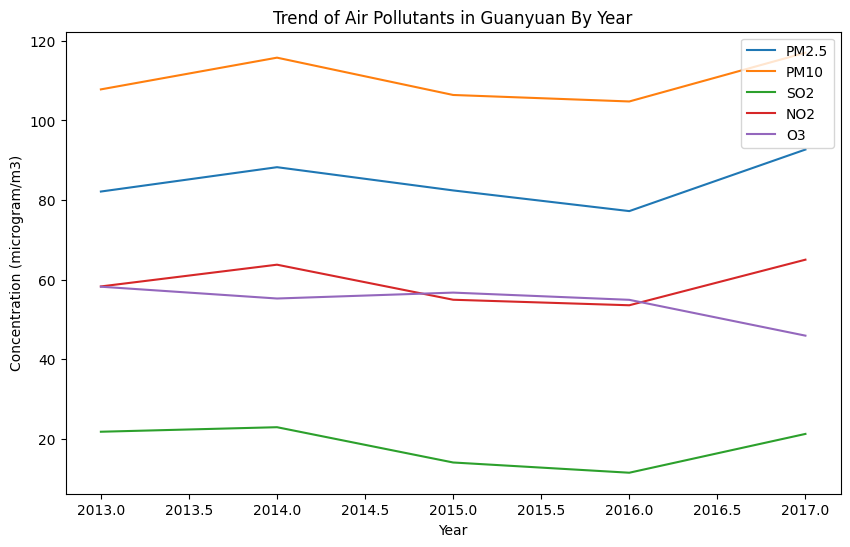

In [38]:
groupByYear = guanyuanDf.groupby("year").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByYear.index, groupByYear["PM2.5"], label="PM2.5")
plt.plot(groupByYear.index, groupByYear["PM10"], label="PM10")
plt.plot(groupByYear.index, groupByYear["SO2"], label="SO2")
plt.plot(groupByYear.index, groupByYear["NO2"], label="NO2")
plt.plot(groupByYear.index, groupByYear["O3"], label="O3")
plt.xlabel("Year")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Trend of Air Pollutants in Guanyuan By Year")
plt.legend()
plt.show()

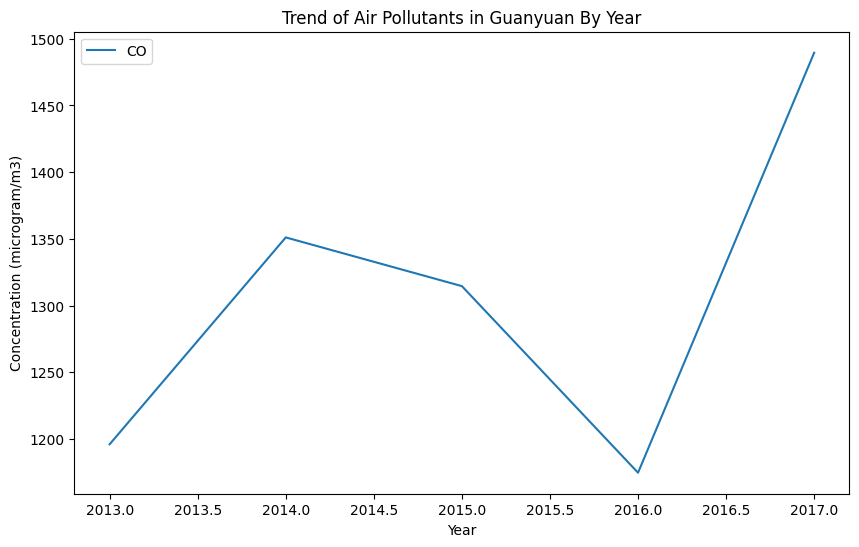

In [39]:
## Because concentration CO is to high we seperate the chart

groupByYear = guanyuanDf.groupby("year").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByYear.index, groupByYear["CO"], label="CO")
plt.xlabel("Year")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Trend of Air Pollutants in Guanyuan By Year")
plt.legend()
plt.show()

Terjadi fluktuasi pada kualitas udara di Guanyuan dalam konsentrasi PM2.5 dengan perbaikan dari 2014 hingga 2016, tetapi terjadi peningkatan kembali di awal 2017.

### Pertanyaan 2: Bagaimana trend udara di Guanyuan berdasarkan bulan?, dan dibulan apakah polusi udara di Guanyuan paling sedikit?

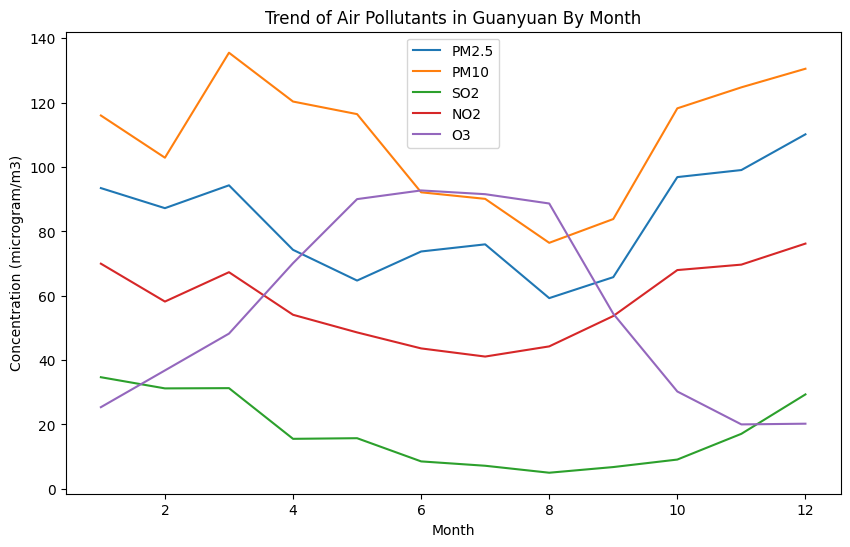

In [40]:
groupByMonth = guanyuanDf.groupby("month").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByMonth.index, groupByMonth["PM2.5"], label="PM2.5")
plt.plot(groupByMonth.index, groupByMonth["PM10"], label="PM10")
plt.plot(groupByMonth.index, groupByMonth["SO2"], label="SO2")
plt.plot(groupByMonth.index, groupByMonth["NO2"], label="NO2")
plt.plot(groupByMonth.index, groupByMonth["O3"], label="O3")
plt.xlabel("Month")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Trend of Air Pollutants in Guanyuan By Month")
plt.legend()
plt.show()

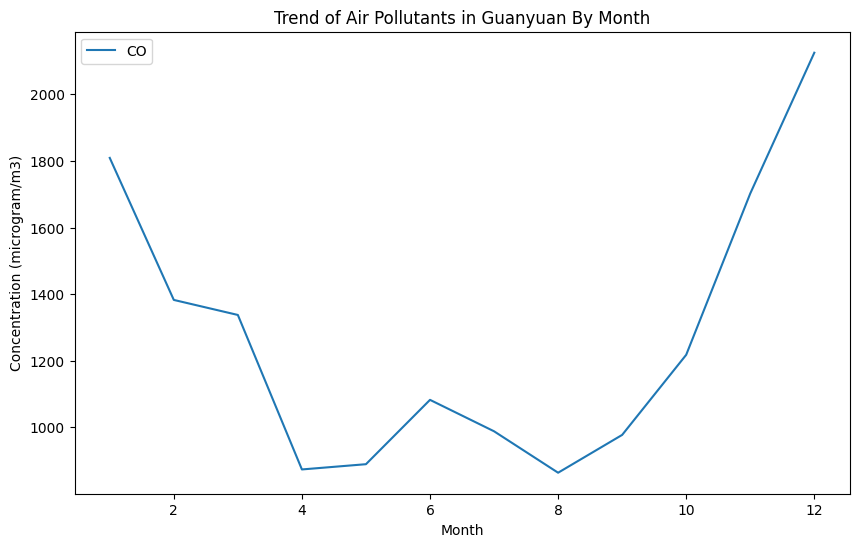

In [41]:
## Because concentration CO is to high we seperate the chart

groupByMonth = guanyuanDf.groupby("month").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByMonth.index, groupByMonth["CO"], label="CO")
plt.xlabel("Month")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Trend of Air Pollutants in Guanyuan By Month")
plt.legend()
plt.show()

Terjadi penurunan trend kualitas udara di Guanyuan pada awal tahun dan naik di akhir tahun, dimana pada bulan Agustus (bulan ke-8) kualitas udara di Guanyuan yang paling bagus/ polusi yang paling sedikit.

### Pertanyaan 3: Bagaimana trend udara di Guanyuan berdasarkan hari?, dan tanggal berapakah polusi udara di Guanyuan paling sedikit?

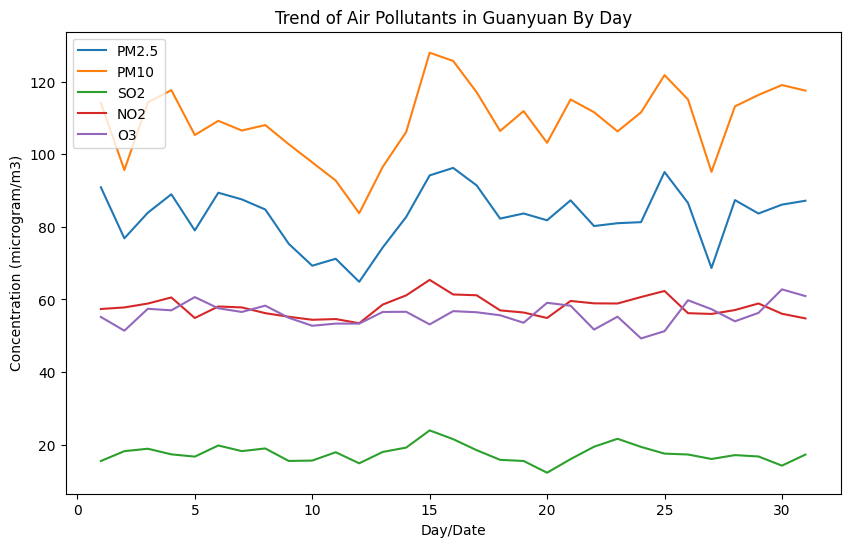

In [42]:
groupByDay = guanyuanDf.groupby("day").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByDay.index, groupByDay["PM2.5"], label="PM2.5")
plt.plot(groupByDay.index, groupByDay["PM10"], label="PM10")
plt.plot(groupByDay.index, groupByDay["SO2"], label="SO2")
plt.plot(groupByDay.index, groupByDay["NO2"], label="NO2")
plt.plot(groupByDay.index, groupByDay["O3"], label="O3")
plt.xlabel("Day/Date")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Trend of Air Pollutants in Guanyuan By Day")
plt.legend()
plt.show()

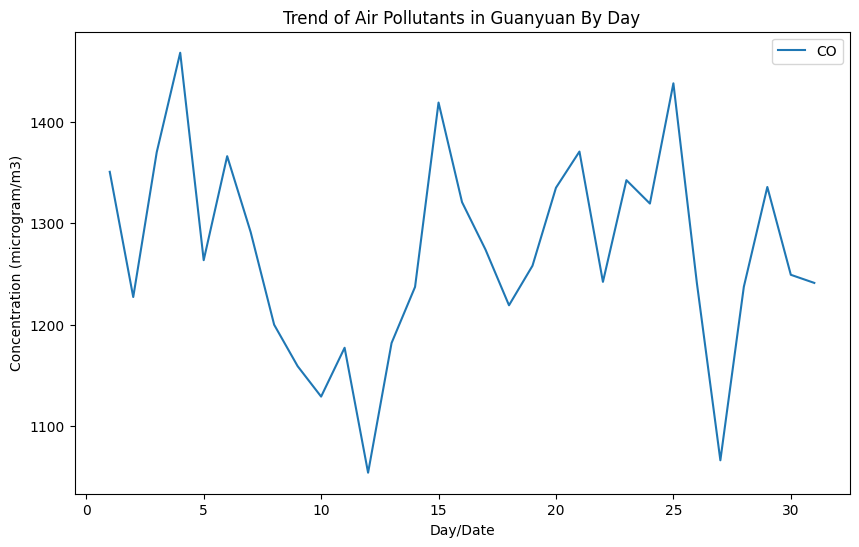

In [43]:
groupByDay = guanyuanDf.groupby("day").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByDay.index, groupByDay["CO"], label="CO")
plt.xlabel("Day/Date")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Trend of Air Pollutants in Guanyuan By Day")
plt.legend()
plt.show()

Tren kualitas udara berdasarkan hari atau tanggal di Guanyuan cenderung stabil tanpa banyak perubahan. Namun, terjadi peningkatan polusi udara setiap tanggal 15. Sementara itu, kualitas udara terbaik di Guanyuan tercatat pada tanggal 12.

### Pertanyaan 4: Bagaimana trend udara di Guanyuan berdasarkan jam?, dan dijam berapakah polusi udara di Guanyuan paling sedikit?

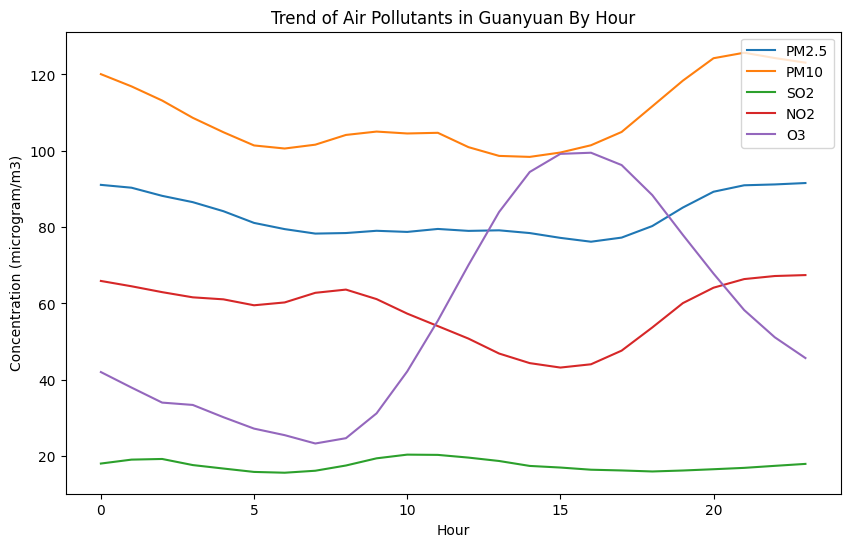

In [44]:
groupByHour = guanyuanDf.groupby("hour").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByHour.index, groupByHour["PM2.5"], label="PM2.5")
plt.plot(groupByHour.index, groupByHour["PM10"], label="PM10")
plt.plot(groupByHour.index, groupByHour["SO2"], label="SO2")
plt.plot(groupByHour.index, groupByHour["NO2"], label="NO2")
plt.plot(groupByHour.index, groupByHour["O3"], label="O3")
plt.xlabel("Hour")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Trend of Air Pollutants in Guanyuan By Hour")
plt.legend()
plt.show()

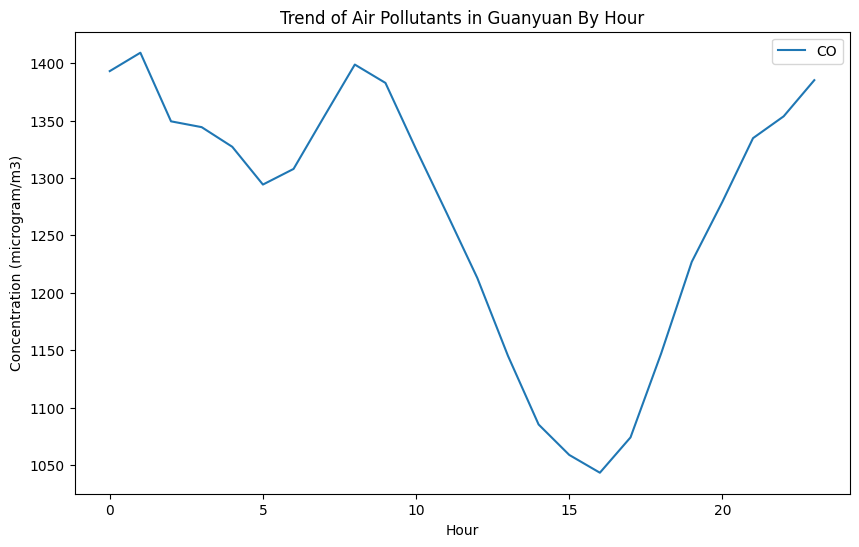

In [45]:
groupByHour = guanyuanDf.groupby("hour").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByHour.index, groupByHour["CO"], label="CO")
plt.xlabel("Hour")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Trend of Air Pollutants in Guanyuan By Hour")
plt.legend()
plt.show()

Tren kualitas udara di Guanyuan menunjukkan penurunan dari tengah malam hingga pukul 5 pagi. Namun, setelah pukul 18, tingkat polusi udara cenderung meningkat. Kualitas udara terbaik terjadi pada pukul 16, karena pada jam tersebut rata-rata polusi mencapai titik terendah.

### Pertanyaan 5: Apakah ada korelasi polusi PM2.5, PM10, SO2, NO2, CO, dan O3 dengan seperti suhu, tekanan, titik embun, hujan, arah angin, dan kecepatan angin?

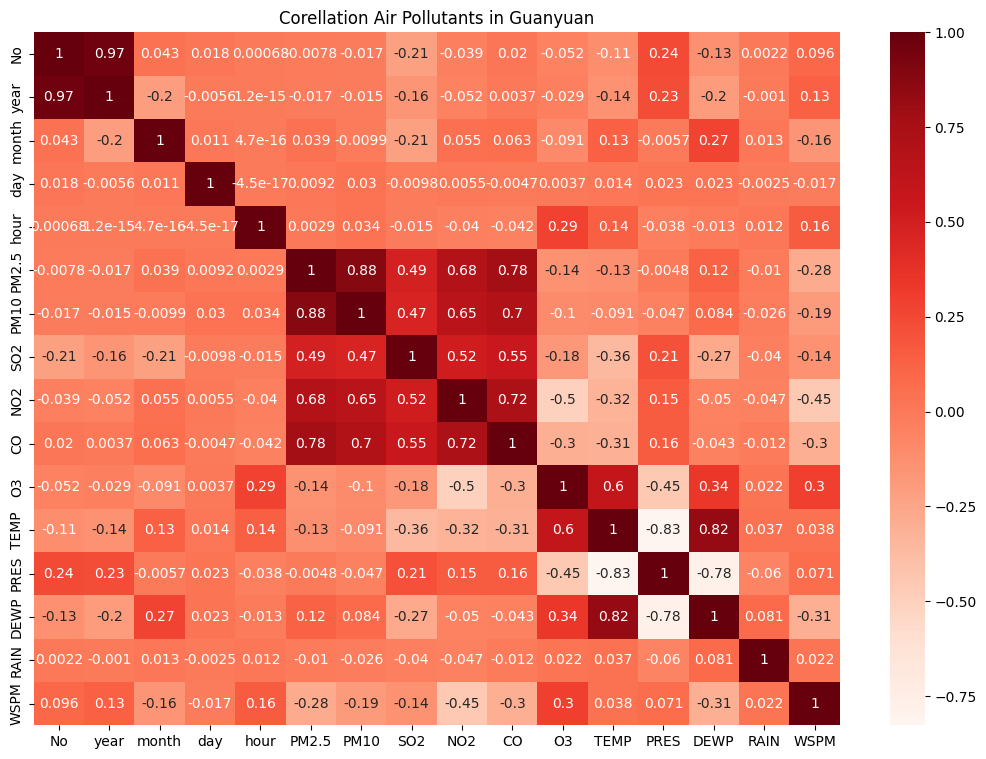

In [46]:
plt.figure(figsize=(13,9))

sns.heatmap(guanyuanDf.corr(numeric_only = True),cmap=plt.cm.Reds,annot=True)
plt.title("Corellation Air Pollutants in Guanyuan")
plt.show()

Terdapat hubungan antara polusi udara (PM2.5, PM10, SO2, NO2, CO, dan O3) dengan faktor meteorologi seperti suhu, tekanan udara, titik embun, curah hujan, arah angin, dan kecepatan angin. Hubungan ini bisa bersifat positif maupun negatif, yang berarti konsentrasi polutan dapat naik atau turun seiring dengan perubahan kondisi meteorologi.

## Conclusion

- Bagaimana kualitas udara di Guanyuan dari tahun ke tahun? apakah ada perbaikan?
> Terjadi fluktuasi pada kualitas udara di Guanyuan dalam konsentrasi PM2.5 dengan perbaikan dari 2014 hingga 2016, tetapi terjadi peningkatan kembali di awal 2017.
- Bagaimana trend udara di Guanyuan berdasarkan bulan?, dan dibulan apakah polusi udara di Guanyuan paling sedikit?
> Terjadi penurunan trend kualitas udara di Guanyuan pada awal tahun dan naik di akhir tahun, dimana pada bulan Agustus (bulan ke-8) kualitas udara di Guanyuan yang paling bagus/ polusi yang paling sedikit.
- Bagaimana trend udara di Guanyuan berdasarkan hari?, dan tanggal berapakah polusi udara di Guanyuan paling sedikit?
> Tren kualitas udara berdasarkan hari atau tanggal di Guanyuan cenderung stabil tanpa banyak perubahan. Namun, terjadi peningkatan polusi udara setiap tanggal 15. Sementara itu, kualitas udara terbaik di Guanyuan tercatat pada tanggal 12.
- Bagaimana trend udara di Guanyuan berdasarkan jam?, dan dijam berapakah polusi udara di Guanyuan paling sedikit?
> Tren kualitas udara di Guanyuan menunjukkan penurunan dari tengah malam hingga pukul 5 pagi. Namun, setelah pukul 18, tingkat polusi udara cenderung meningkat. Kualitas udara terbaik terjadi pada pukul 16, karena pada jam tersebut rata-rata polusi mencapai titik terendah.
- Apakah ada korelasi polusi PM2.5, PM10, SO2, NO2, CO, dan O3 dengan seperti suhu, tekanan, titik embun, hujan, arah angin, dan kecepatan angin?
> Terdapat hubungan antara polusi udara (PM2.5, PM10, SO2, NO2, CO, dan O3) dengan faktor meteorologi seperti suhu, tekanan udara, titik embun, curah hujan, arah angin, dan kecepatan angin. Hubungan ini bisa bersifat positif maupun negatif, yang berarti konsentrasi polutan dapat naik atau turun seiring dengan perubahan kondisi meteorologi.